In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from scipy.optimize import minimize_scalar, curve_fit
from scipy.integrate import quad

# $\mathcal{K}_{\text{inf}}^{\mathcal{F}}(\nu, \mu) = \inf \{ KL(\nu, \tilde{\nu}) \text{ s.t } \tilde{\nu}\in\mathcal{F}, \mathbb{E}_{\tilde{\nu}}[X] > \mu\}$

If $(\mathcal{F}_{B})_{B\in\mathbb{R_+}}$ is such that $B<B'\implies \mathcal{F}_B \subseteq \mathcal{F}_{B'}$, then $\mathcal{K}_{\text{inf}}^{\mathcal{F}_{B'}}(\nu, \mu) \leq \mathcal{K}_{\text{inf}}^{\mathcal{F}_B}(\nu, \mu)$. How fast does $\mathcal{K}_{\text{inf}}^{\mathcal{F}_B}(\nu, \mu)$ decays with $B$?

For bounded distributions $\mathcal{F}_B = \{\nu, \text{supp}(\nu)\subseteq [0, B]\}$, the dual problem reads 
$$
\mathcal{K}_{\text{inf}}^{\mathcal{F}_B}(\nu, \mu) = \max_{\lambda\in[0, \frac{1}{B-\mu})} \mathbb{E}_{\nu}[\log(1-\lambda(X-\mu))].
$$

In [3]:
def Kinf(p, mu, B):
    """
    p: pdf on [0, 1]
    mu: in [0, 1]
    B: >1
    """
    def f(l):
        return quad(lambda x: np.log(1 - l * (x - mu)) * p(x), 0, 1)[0]

    ret = minimize_scalar(
        f, method='bounded', bounds=(0, 1 / (B - mu))
        )
    if ret.success:
        kinf = -ret.fun
    else:
        kinf = np.nan
    return kinf

In [4]:
def inv_trend(x, a, b, c):
    return a / (x + b) + c

In [5]:
mu = 0.51
B = np.linspace(1, 5, 100)

### Uniform

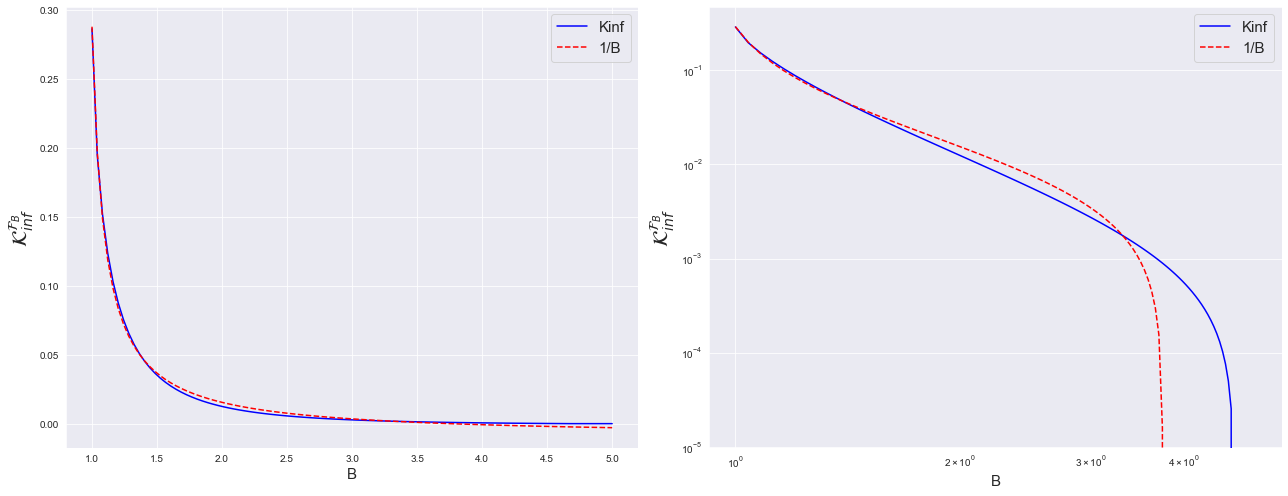

In [6]:
def p(x): return 1
kinfs = np.array([Kinf(p, mu, b) for b in tqdm(B)])

popt, _ = curve_fit(inv_trend, B, kinfs, p0=(1.0, 0.0, 0.0))
fitted_trend = lambda x: inv_trend(x, popt[0], popt[1], popt[2])

with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(figsize=(18, 7), nrows=1, ncols=2)
    
    ax = axes[0]
    ax.plot(B, kinfs, color='blue', label='Kinf')
    ax.plot(B, fitted_trend(B), 'red', linestyle='dashed', label='1/B')
    ax.legend(loc='upper right', prop={'size': 15})
    ax.set_xlabel('B', fontsize=15)
    ax.set_ylabel('$\mathcal{K}_{inf}^{\mathcal{F}_B}$', fontsize=20)
    
    ax = axes[1]
    ax.loglog(B, kinfs, color='blue', label='Kinf')
    ax.loglog(B, fitted_trend(B), 'red', linestyle='dashed', label='1/B')
    ax.legend(loc='upper right', prop={'size': 15})
    ax.set_xlabel('B', fontsize=15)
    ax.set_ylabel('$\mathcal{K}_{inf}^{\mathcal{F}_B}$', fontsize=20)
    
    plt.tight_layout()
    plt.show()

### Triangular

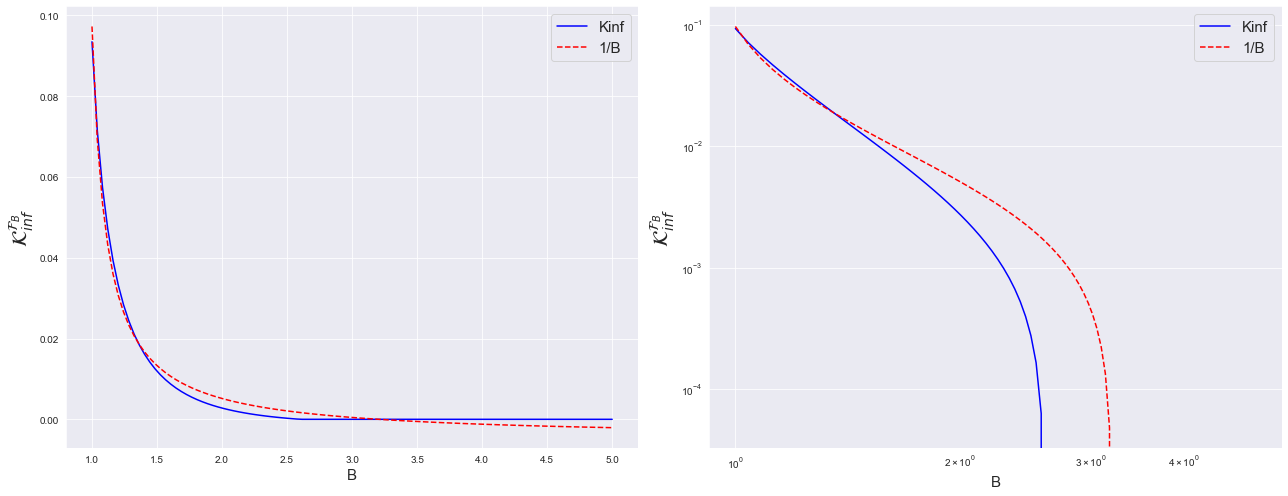

In [7]:
def p(x):
    return 4 * np.clip(0.5-np.abs(x-0.5), 0, 1)
kinfs = np.array([Kinf(p, mu, b) for b in tqdm(B)])

popt, _ = curve_fit(inv_trend, B, kinfs, p0=(1.0, 0.0, 0.0))
fitted_trend = lambda x: inv_trend(x, popt[0], popt[1], popt[2])

with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(figsize=(18, 7), nrows=1, ncols=2)
    
    ax = axes[0]
    ax.plot(B, kinfs, color='blue', label='Kinf')
    ax.plot(B, fitted_trend(B), 'red', linestyle='dashed', label='1/B')
    ax.legend(loc='upper right', prop={'size': 15})
    ax.set_xlabel('B', fontsize=15)
    ax.set_ylabel('$\mathcal{K}_{inf}^{\mathcal{F}_B}$', fontsize=20)
    
    ax = axes[1]
    ax.loglog(B, kinfs, color='blue', label='Kinf')
    ax.loglog(B, fitted_trend(B), 'red', linestyle='dashed', label='1/B')
    ax.legend(loc='upper right', prop={'size': 15})
    ax.set_xlabel('B', fontsize=15)
    ax.set_ylabel('$\mathcal{K}_{inf}^{\mathcal{F}_B}$', fontsize=20)
    
    plt.tight_layout()
    plt.show()